# Decision_Tree
* 모델1
* upsampling + MinMax 
* 결정트리 기반의 앙상블 학습인 랜덤 포레스트 사용

In [2]:
# 라이브러리 로드
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV

In [3]:
# 데이터 로딩
df = pd.read_csv('./MinMax_model01.csv', encoding='utf-8')
df

,일시,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
0,2012-08-02 04:00:00,0.334646,0.409742,0.107143,0.128205,0.463588,1.0
1,2018-06-15 18:00:00,0.350394,0.438395,0.107143,0.115385,0.529307,1.0
2,2018-04-24 12:00:00,0.188976,0.375358,0.089286,0.089744,0.467140,1.0
3,2018-03-22 06:00:00,0.094488,0.300860,0.285714,0.282051,0.536412,1.0
4,2018-03-17 08:00:00,0.192913,0.249284,0.107143,0.115385,0.870337,1.0
...,...,...,...,...,...,...,...
199504,2018-03-20 10:00:00,0.578740,0.756447,0.392857,0.410256,0.735346,2.0
199505,2012-04-03 07:00:00,0.212598,0.469914,0.196429,0.217949,0.197158,2.0
199506,2018-07-03 20:00:00,0.622047,0.767908,0.410714,0.435897,0.111901,2.0
199507,2018-03-20 09:00:00,0.531496,0.704871,0.357143,0.371795,0.721137,2.0


In [4]:
# obj -> datetime
df['일시'] = pd.to_datetime(df['일시'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199509 entries, 0 to 199508
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   일시          199509 non-null  datetime64[ns]
 1   WIND_SPEED  199509 non-null  float64       
 2   GUST_WIND   199509 non-null  float64       
 3   SIG_WAVE    199509 non-null  float64       
 4   MAX_WAVE    199509 non-null  float64       
 5   HPA         199509 non-null  float64       
 6   특보강도        199509 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 10.7 MB


In [5]:
df = df.set_index('일시')
df

,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
일시,,,,,,
2012-08-02 04:00:00,0.334646,0.409742,0.107143,0.128205,0.463588,1.0
2018-06-15 18:00:00,0.350394,0.438395,0.107143,0.115385,0.529307,1.0
2018-04-24 12:00:00,0.188976,0.375358,0.089286,0.089744,0.467140,1.0
2018-03-22 06:00:00,0.094488,0.300860,0.285714,0.282051,0.536412,1.0
2018-03-17 08:00:00,0.192913,0.249284,0.107143,0.115385,0.870337,1.0
...,...,...,...,...,...,...
2018-03-20 10:00:00,0.578740,0.756447,0.392857,0.410256,0.735346,2.0
2012-04-03 07:00:00,0.212598,0.469914,0.196429,0.217949,0.197158,2.0
2018-07-03 20:00:00,0.622047,0.767908,0.410714,0.435897,0.111901,2.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 199509 entries, 2012-08-02 04:00:00 to 2018-03-22 03:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   WIND_SPEED  199509 non-null  float64
 1   GUST_WIND   199509 non-null  float64
 2   SIG_WAVE    199509 non-null  float64
 3   MAX_WAVE    199509 non-null  float64
 4   HPA         199509 non-null  float64
 5   특보강도        199509 non-null  float64
dtypes: float64(6)
memory usage: 10.7 MB


In [7]:
# 데이터셋 구성
X= df.drop(['특보강도'], axis=1)
y= df['특보강도']

* 훈련하기~

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

In [9]:
# 훈련세트, 테스트 세트 크기
print(x_train.shape, x_test.shape)

(159607, 5) (39902, 5)


In [10]:
# StandardScaler 사용해서 훈련세트 전처리
# 같은 객체로 테스트 세트 변환
ss = StandardScaler()
ss.fit(x_train)
train_scaled = ss.transform(x_train)
test_scaled = ss.transform(x_test)

In [11]:
# 로지스틱 회귀 모델 훈련
lr = LogisticRegression()
lr.fit(train_scaled, y_train)
print(lr.score(train_scaled, y_train))
print(lr.score(test_scaled, y_test))

# 둘 다 낮게 나옴...

0.8237295356719944
0.8249711793895043


In [12]:
# 로지스틱 회귀가 학습한 계수와 절편 출력
print(lr.coef_, lr.intercept_)

[[-0.68038122 -1.20399373 -2.71809598 -1.95714127  0.30068796]
 [-0.18053745  0.29430995 -1.75016411  2.6276456  -0.16175227]
 [ 0.86091867  0.90968378  4.46826009 -0.67050433 -0.13893569]] [-2.4329528   1.95072062  0.48223217]


In [13]:
# score() 메서드로 정확도 평가
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, y_train)
print(dt.score(train_scaled, y_train)) # 훈련 세트
print(dt.score(test_scaled, y_test)) # 테스트 세트

0.9999874692212748
0.9926319482732695


In [14]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
model

DecisionTreeClassifier()

* plot

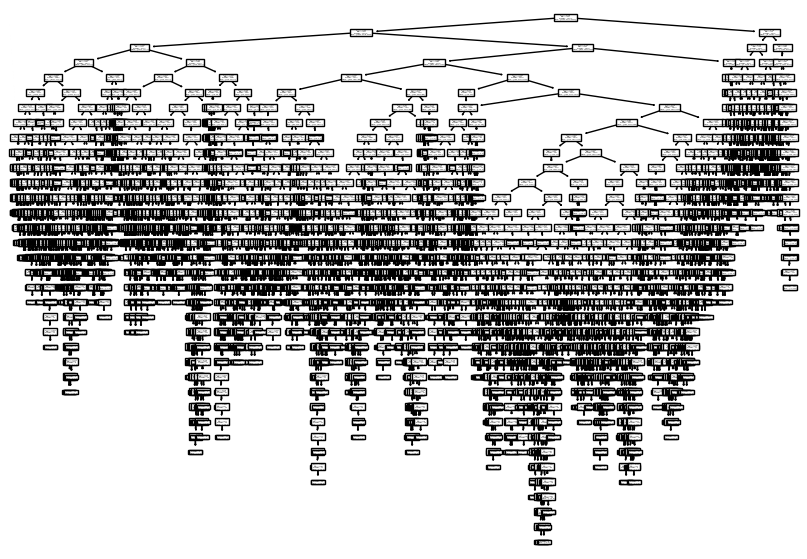

In [15]:
# plot_tree() 트리
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

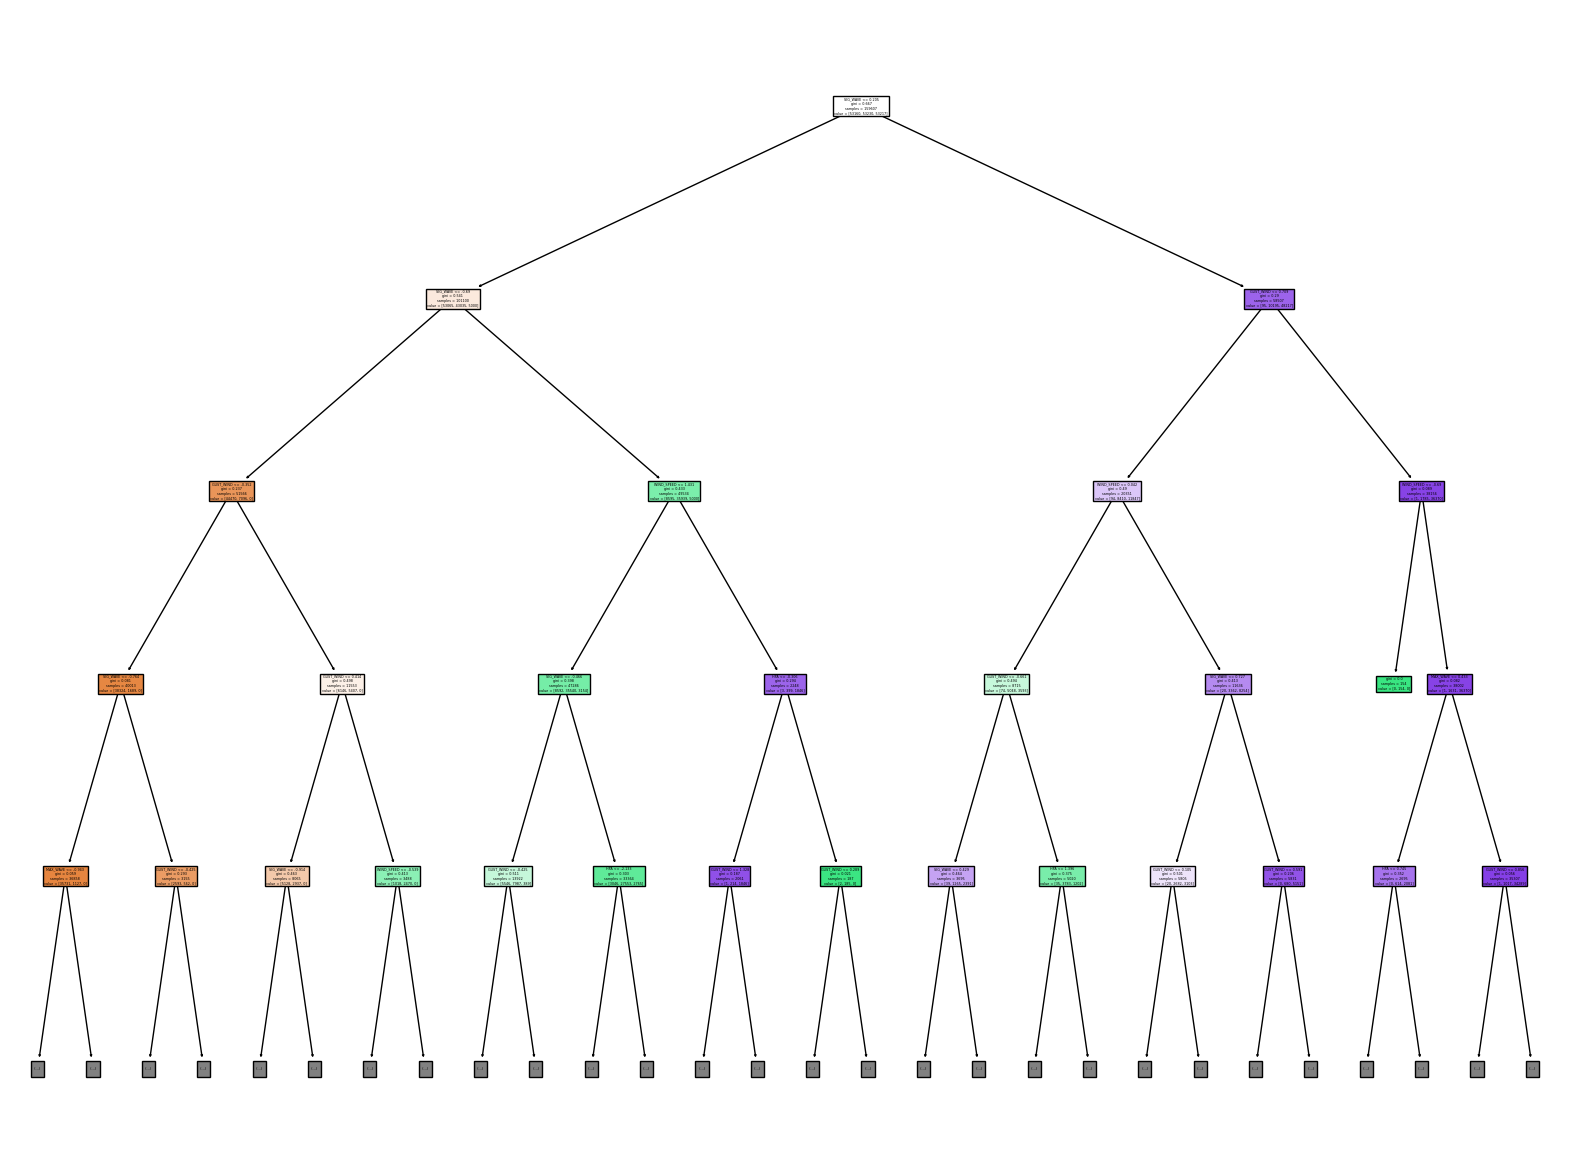

In [16]:
# 트리 깊이 제한
plt.figure(figsize=(20,15))
plot_tree(dt, max_depth=4, filled=True, feature_names=['WIND_SPEED','GUST_WIND','MAX_WAVE','SIG_WAVE','HPA'])
plt.show()

In [17]:
# 가지치기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.8250390020487823
0.8229913287554509


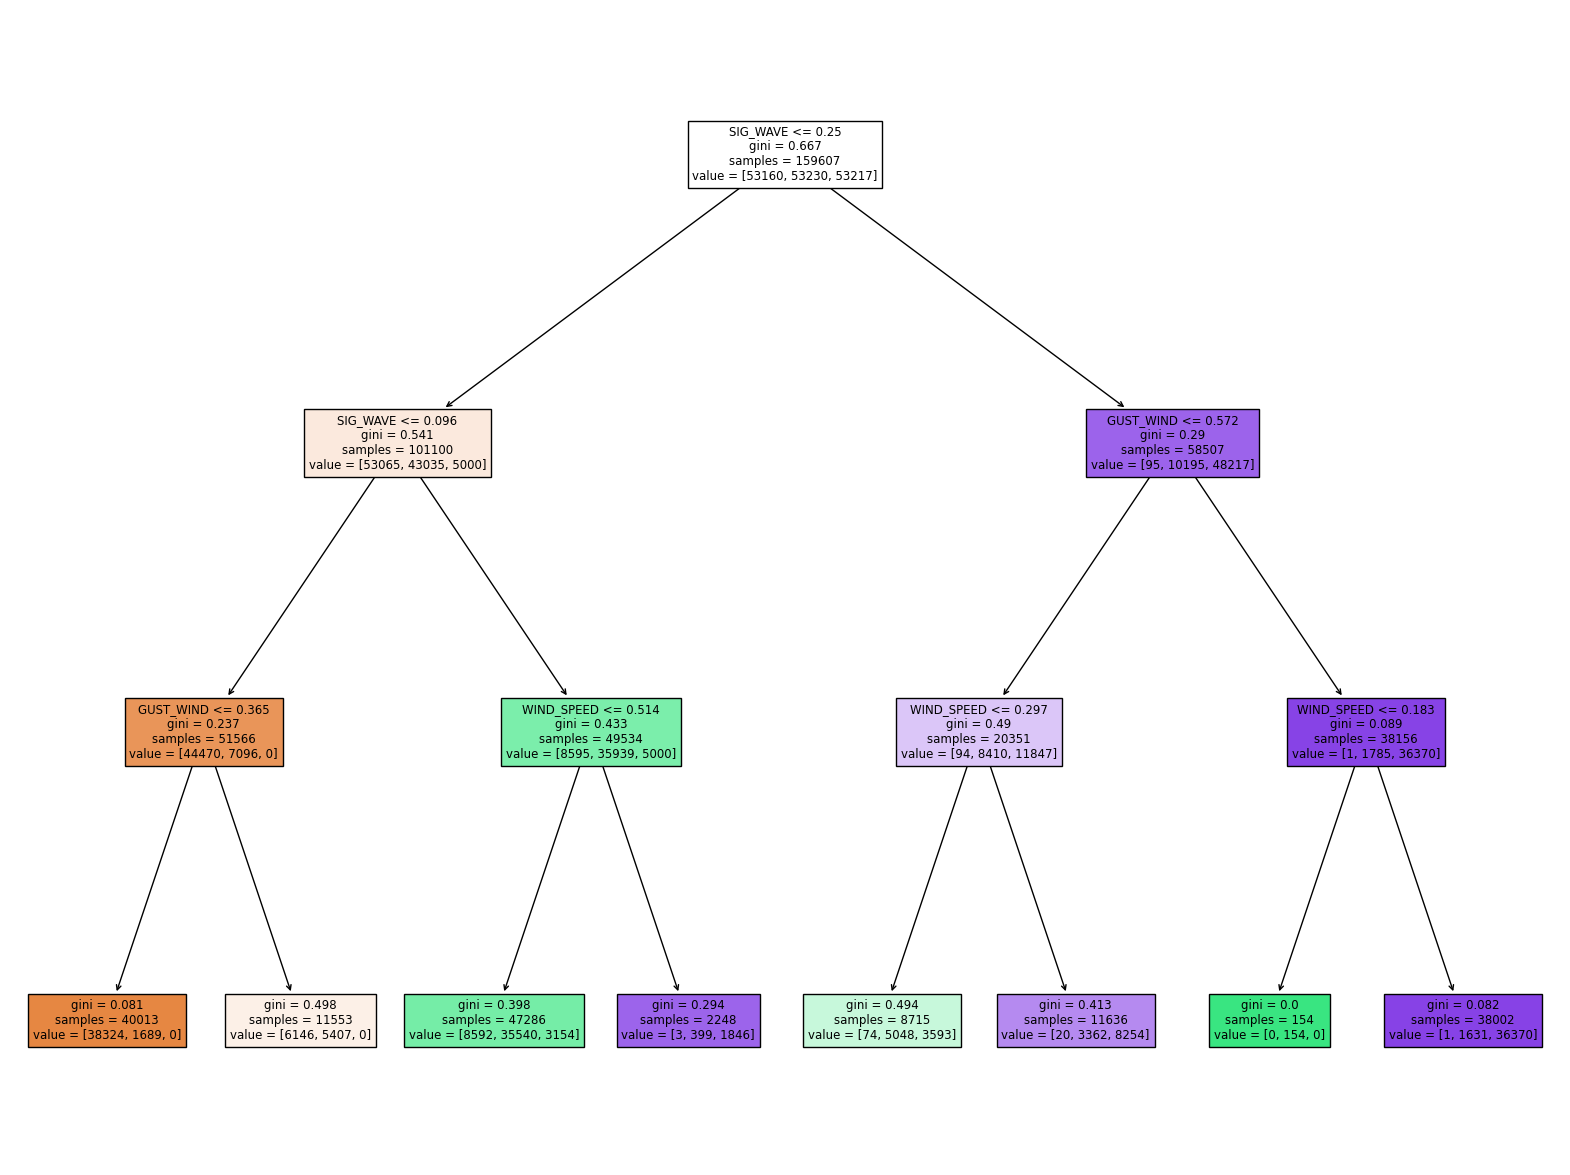

In [18]:
# plot tree()
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['WIND_SPEED','GUST_WIND','MAX_WAVE','SIG_WAVE','HPA'])
plt.show()

In [19]:
# 특성 중요도
print(dt.feature_importances_)

[0.0477795  0.10441096 0.         0.84780954 0.        ]


## 성능지표

In [22]:
# 라이브러리 로드
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [24]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
pred = dt.predict(x_test)

In [25]:
# 로지스틱 회귀 평가지표
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     13343
         1.0       0.98      1.00      0.99     13273
         2.0       1.00      1.00      1.00     13286

    accuracy                           0.99     39902
   macro avg       0.99      0.99      0.99     39902
weighted avg       0.99      0.99      0.99     39902



In [26]:
cm = confusion_matrix(y_test, pred)

In [27]:
# 오차행렬
cm

array([[13047,   293,     3],
       [    0, 13273,     0],
       [    0,     0, 13286]], dtype=int64)